In [1]:
from seir_bayes import make_lognormal_params_95_ci, run_SEIR_BAYES_model, seir_bayes_plot
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
N = 13_000_000
E0, I0, R0 = 300, 250, 1
R0__params = make_lognormal_params_95_ci(1.96, 2.55)
gamma_inv_params = make_lognormal_params_95_ci(10, 16)
alpha_inv_params = make_lognormal_params_95_ci(4.1, 7)
t_max = 30*6
runs = 1_000

In [3]:
def run_SEIR_BAYES_model2(N, E0, I0, R0,
                          R0__params,
                          gamma_inv_params,
                          alpha_inv_params,
                          t_max, runs):
    S0 = N - (I0 + R0 + E0)
    t_space = np.arange(0, t_max)

    size = (t_max, runs)

    S = np.zeros(size)
    E = np.zeros(size)
    I = np.zeros(size)
    R = np.zeros(size)
    
    S[0, ], E[0, ], I[0, ], R[0, ] = S0, E0, I0, R0

    R0_ = npr.lognormal(*map(np.log, R0__params), runs)
    gamma = 1/npr.lognormal(*map(np.log, gamma_inv_params), runs)
    alpha = 1/npr.lognormal(*map(np.log, alpha_inv_params), runs)
    beta = R0_*gamma
   
    for t in t_space[1:]:
        SE = npr.binomial(S[t-1, ].astype('int'), 1 - np.exp(-beta*I[t-1, ]/N))
        EI = npr.binomial(E[t-1, ].astype('int'), 1 - np.exp(-alpha))
        IR = npr.binomial(I[t-1, ].astype('int'), 1 - np.exp(-gamma))

        dS =  0 - SE
        dE = SE - EI
        dI = EI - IR
        dR = IR - 0

        S[t, ] = S[t-1, ] + dS
        E[t, ] = E[t-1, ] + dE
        I[t, ] = I[t-1, ] + dI
        R[t, ] = R[t-1, ] + dR
    
    return S, E, I, R, t_space


Run Time: 3.323564 seconds


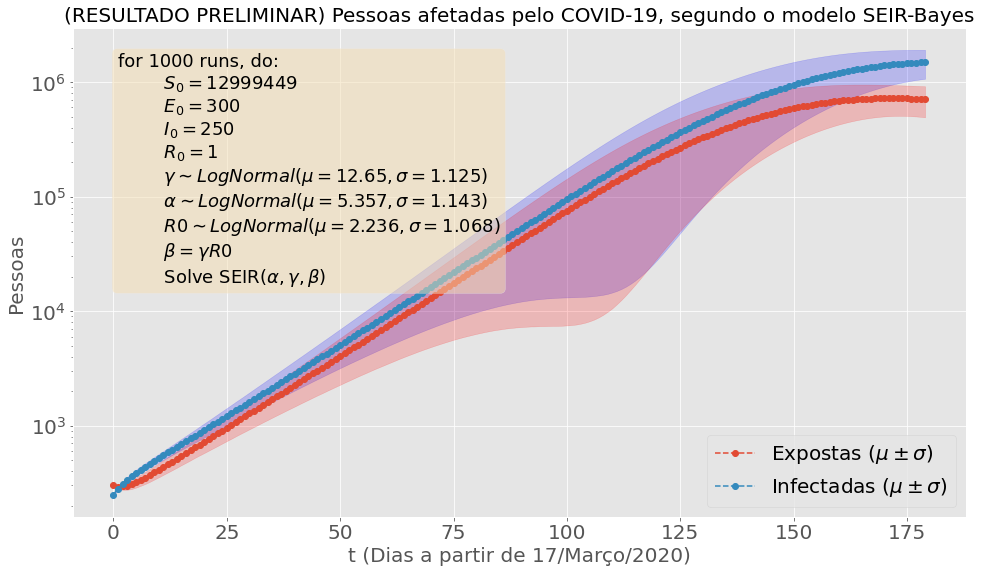

In [4]:
npr.seed(10151)
start = datetime.now()
S, E, I, R, t_space = run_SEIR_BAYES_model(
                                  N, E0, I0, R0,
                                  R0__params,
                                  gamma_inv_params,
                                  alpha_inv_params,
                                  t_max, runs)
print('Run Time: {} seconds'.format((datetime.now() - start).total_seconds()))
fig = seir_bayes_plot(N, E0, I0, R0,
                      R0__params,
                      gamma_inv_params,
                      alpha_inv_params,
                      t_max, runs, S, E, I, R, t_space)
plt.show()

Run Time: 0.098295 seconds


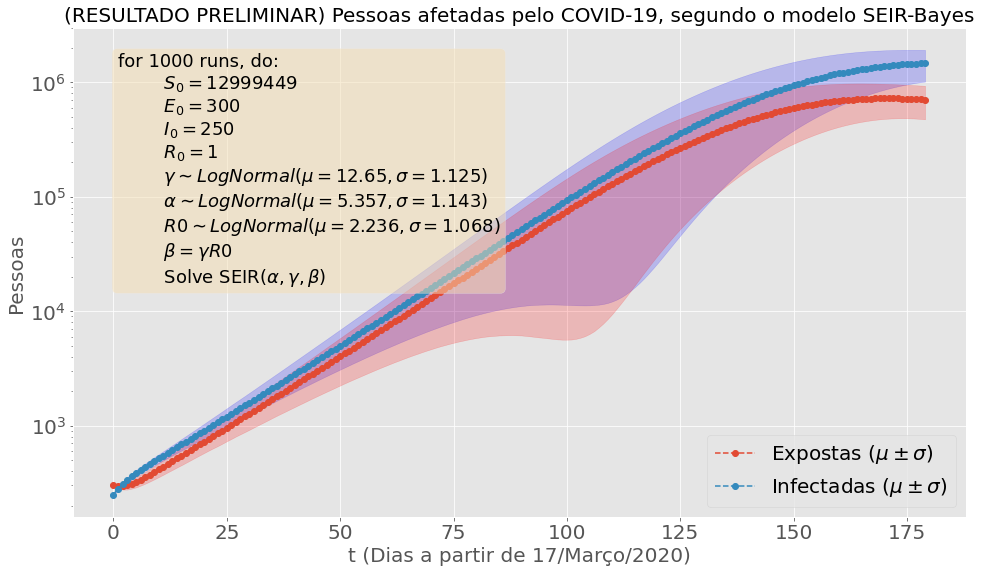

In [5]:
npr.seed(10151) ## really not sure this random seed works
start = datetime.now()
S, E, I, R, t_space = run_SEIR_BAYES_model2(N, E0, I0, R0,
                                            R0__params,
                                            gamma_inv_params,
                                            alpha_inv_params,
                                            t_max, runs)
print('Run Time: {} seconds'.format((datetime.now() - start).total_seconds()))
fig = seir_bayes_plot(N, E0, I0, R0,
                      R0__params,
                      gamma_inv_params,
                      alpha_inv_params,
                      t_max, runs, S, E, I, R, t_space)
plt.show()